In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [20]:
import torch
#set random seeds for reproduciability
torch.manual_seed(42)

In [21]:
df = pd.read_csv('fmnist_small.csv')

In [22]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,0,0,0,0,0,0,0,0,...,69,12,0,0,0,0,0,0,0,0
5996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,8,0,0,0,0,0,0,0,0,0,...,39,47,2,0,0,29,0,0,0,0
5998,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


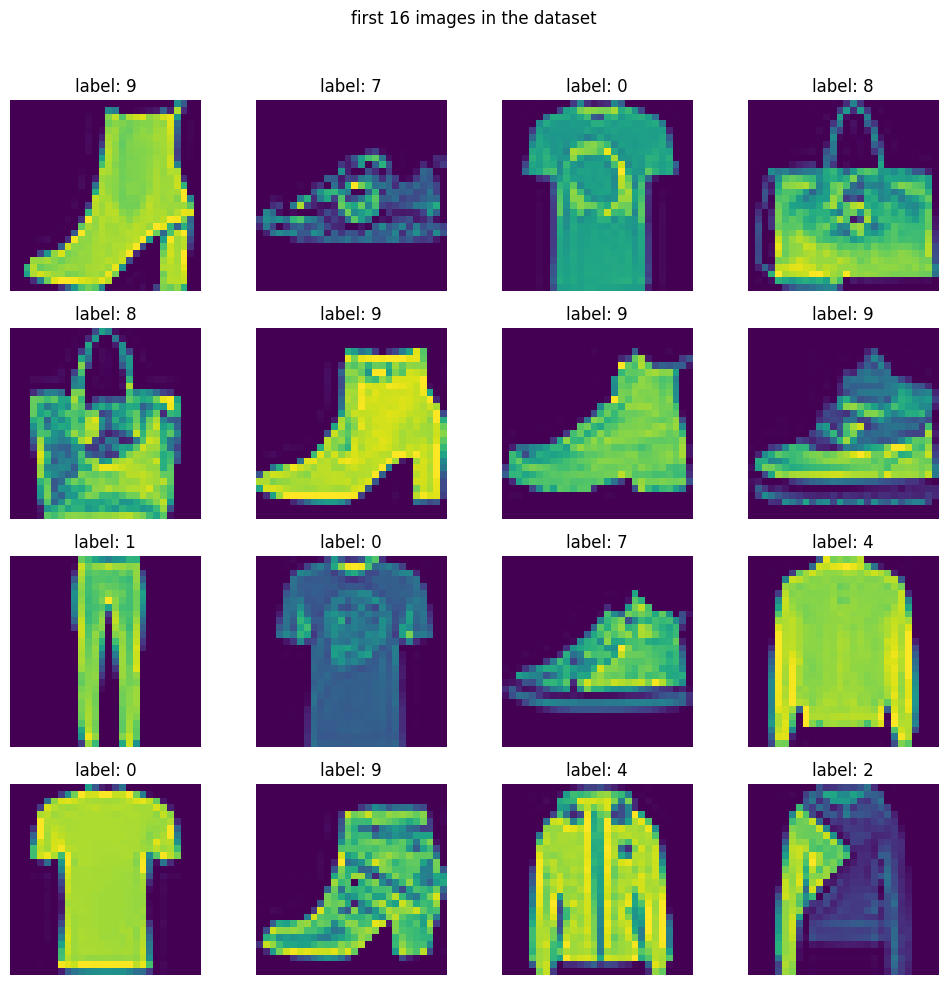

In [23]:
#creating a 4x4 grid images
fig, axis = plt.subplots(4,4, figsize=(10,10))
fig.suptitle('first 16 images in the dataset')

# plot the first 16 images of the dataset

for i,ax in enumerate(axis.flat):
    img = df.iloc[i,1:].values.reshape(28,28) #reshape to 28x28
    ax.imshow(img) # image showing in grey
    ax.axis('off')
    ax.set_title(f'label: {df.iloc[i,0]}') # show lable

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [50]:
# dividing data into train and test

X = df.iloc[:,1:].values
y = df.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
# scaling featurea -> bacially bringing features in between of 0 and 1

X_train =  X_train/255.0
X_test = X_test/255.0

### creating custom data set class

In [52]:
class CustomDataset(Dataset):

  def __init__(self,features,lables):
    self.features = torch.tensor(features,dtype=torch.float32)
    self.lables = torch.tensor(lables,dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,idx):
    return self.features[idx],self.lables[idx]

In [53]:
#creating train and test dataset objects

train_dataset = CustomDataset(X_train,y_train)
test_dataset = CustomDataset(X_test,y_test)

In [28]:
len(train_dataset)

4800

In [29]:
train_dataset[1]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0039, 0.0000, 0.0000, 0.3843, 0.3765, 0.3922, 0.3804, 0.3176, 0.0000,
         0.0000, 0.0078, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0039,
         0.0000, 0.0000, 0.0000, 0.0275, 0.8627, 0.7059, 0.6196, 0.6471, 0.8157,
         0.0275, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000,
         0.0000, 0.0000, 0.0275, 0.3529, 0.7098, 0.5529, 0.7137, 0.8980, 0.7137,
         0.6471, 0.7765, 0.4353, 0.1608, 0.0000, 0.0000, 0.0000, 0.0039, 0.0039,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.3137, 0.5804, 0.7098, 0.7059, 0.5922, 0.5882, 0.5490, 0.7647,
         0.5765, 0.6588, 0.6157, 0.6863, 0.7686, 0.6588, 0.4196, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [54]:
#creating train and test loader
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=False)

In [40]:
#define nn module
class MyNn(nn.Module):

  def __init__(self, num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
    )

  def forward(self,x):
    return self.model(x)

In [59]:
# seting learning rate and epochs
ecochs = 100
learning_rate = 0.001

In [60]:
# instatiate the model
model = MyNn(X_train.shape[1])

In [61]:
#define loss and optimizer
criterian = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

In [62]:
len(train_loader)

150

In [63]:
from torch.nn.modules import loss
# training loop

for epochs in range(ecochs):

  total_epoch_loss = 0.0

  for batch_features,batch_lables in train_loader:

    #forword pass
    outputs = model(batch_features)

    #calculate loss
    loss  = criterian(outputs,batch_lables)

    #backward pass
    optimizer.zero_grad()
    loss.backward()

    #update grads
    optimizer.step()
    total_epoch_loss += loss.item()

  avg_epoch_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch [{epochs+1}/{ecochs}], Loss: {avg_epoch_loss:.4f}')

Epoch [1/100], Loss: 1.0314
Epoch [2/100], Loss: 0.6267
Epoch [3/100], Loss: 0.5446
Epoch [4/100], Loss: 0.5010
Epoch [5/100], Loss: 0.4497
Epoch [6/100], Loss: 0.4270
Epoch [7/100], Loss: 0.3934
Epoch [8/100], Loss: 0.3758
Epoch [9/100], Loss: 0.3490
Epoch [10/100], Loss: 0.3254
Epoch [11/100], Loss: 0.3072
Epoch [12/100], Loss: 0.3041
Epoch [13/100], Loss: 0.2766
Epoch [14/100], Loss: 0.2559
Epoch [15/100], Loss: 0.2432
Epoch [16/100], Loss: 0.2380
Epoch [17/100], Loss: 0.2285
Epoch [18/100], Loss: 0.2157
Epoch [19/100], Loss: 0.2009
Epoch [20/100], Loss: 0.1879
Epoch [21/100], Loss: 0.1780
Epoch [22/100], Loss: 0.1821
Epoch [23/100], Loss: 0.1803
Epoch [24/100], Loss: 0.1671
Epoch [25/100], Loss: 0.1624
Epoch [26/100], Loss: 0.1395
Epoch [27/100], Loss: 0.1596
Epoch [28/100], Loss: 0.1453
Epoch [29/100], Loss: 0.1371
Epoch [30/100], Loss: 0.1213
Epoch [31/100], Loss: 0.1117
Epoch [32/100], Loss: 0.1247
Epoch [33/100], Loss: 0.0964
Epoch [34/100], Loss: 0.0963
Epoch [35/100], Loss: 0

In [64]:
#set model to eval mode
model.eval()

MyNn(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [65]:
# evaluation code - no builtin functions

total = 0
correct = 0

with torch.no_grad():
  for batch_features,batch_lables in test_loader:
    output = model(batch_features)
    _,predicted = torch.max(output.data,1)
    total += batch_lables.shape[0]
    correct += (predicted == batch_lables).sum().item()

print(correct/total)

0.8283333333333334
